In [95]:
#Zadanie 1
using LinearAlgebra
using Random
using DataFrames
using CSV

function dot_product(v, u)
    return dot(v, u)
end

function sq_matrix_vector_product(M, v)
    return M*v
end

sizes, dot_measurments, multi_measurments = [], [], []
for s in 0:10
    if s == 0
        tmp = @elapsed dot_product(rand(s*1000), rand(s*1000))
        tmp = @elapsed sq_matrix_vector_product(rand(s*1000, s*1000), rand(s*1000))
    else
        for i in 1:10
            push!(sizes, 1000*s)
            push!(dot_measurments, @elapsed dot_product(rand(s*1000), rand(s*1000)))
            push!(multi_measurments, @elapsed sq_matrix_vector_product(rand(s*1000, s*1000), rand(s*1000)))
        end
    end
end

df = DataFrame(size = sizes, dot = dot_measurments, multi = multi_measurments)
CSV.write("ex1_results.csv", df)

"ex1_results.csv"

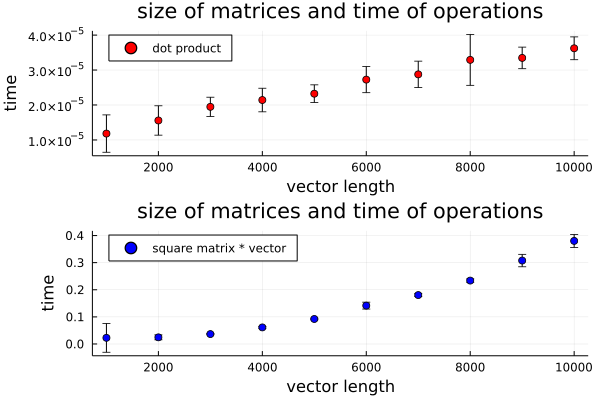

In [110]:
#zadanie 1 cd
using DataFrames
using CSV
using Statistics
using Plots

data = CSV.read("ex1_results.csv", delim = ",", DataFrame)
data = groupby(data, :size)
data = combine(data, "dot" => mean, "dot" => std, "multi" => mean, "multi" => std)

scatter(data.size, [data.dot_mean data.multi_mean],
    title = "size of matrices and time of operations",
    xlab = "vector length", ylab = "time [s]",
    label = ["dot product" "square matrix * vector"],
    legend = :topleft,
    yerr = [data.dot_std data.multi_std],
    colour = [:red :blue],
    layout=(2,1))
